Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Kenneth David Leonel Triana CC: 1192817456

Librerias 

In [1]:
# Carga de librerias
from IPython.display import display
import subprocess as sp
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import random
import time
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#Modelos
from sklearn import svm
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pickle



Configuraciones básicas para el desarrollo

In [2]:

# Configurar parametros de pandas y matplotlib
pd.set_option('display.precision', 4)
%config IPCompleter.greedy=True
%matplotlib inline

params = {}
plt.rcParams.update(params)
params = {
           'legend.fontsize': 20,
           'legend.handlelength': 2,
           'axes.titlesize':'20',
           'xtick.labelsize':'20',
           'ytick.labelsize':'20'
         }

matplotlib.rcParams.update(params)

Unificar en archivos los datos de las diferentes estaciones

Cambiar el codigo por el nombre de la estación

In [3]:
def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 84 or codigo == 198:
        return 'Estacion Poblado'
    elif codigo == 86 or codigo == 68:
        return 'Estacion Aranjuez'
    elif codigo == 83 or codigo == 197 or codigo == 9:
        return 'Estacion Belen'

In [4]:

def unificar_archivos_excel(carpeta_principal, archivo_salida):
    # Lista para almacenar todos los dataframes
    dfs = []
    
    # Recorre todos los archivos en la carpeta principal y subcarpetas
    for root, dirs, files in os.walk(carpeta_principal):
        for file in files:
            if file.endswith('.csv') or file.endswith('.xlsx'):  # Verifica si es un archivo Excel
                archivo_actual = os.path.join(root, file)
                print (f"El nombre de archivo es : {archivo_actual}") #El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_83_20230701_20240930.csv 
                
                #Se guarda el numero de la estación que pertenece el archivo
                estacion = file.split('_')[3]
                print(f"Estación  numero: {estacion}")  # Estación : 83 
                try:
                    # Lee el archivo Excel y agrega su contenido a la lista
                    df = pd.read_csv(archivo_actual)
                    #Pasar las columnas a minusculas
                    df.columns = df.columns.str.lower()
                    # Agregar una columna con el código de la estación al DataFrame
                    df['codigo'] = estacion  # Agrega una columna con el número de la estación
                    dfs.append(df)
                except Exception as e:
                    print(f"No se pudo leer el archivo {archivo_actual}: {e}")

    # Si hay archivos leídos, unificarlos en un solo DataFrame
    if dfs:
        df_unificado = pd.concat(dfs, ignore_index=True)
        
        # Guardar el DataFrame unificado en un archivo Excel
        df_unificado.to_csv(archivo_salida, index=False)
        print(f"Archivos unificados en {archivo_salida}")
    else:
        print("No se encontraron archivos Excel.")

# Usar el script
carpeta_calidad = 'data/raw/calidad'  # Ruta a la carpeta principal
archivo_calidad = 'data/stage/unificado_calidad.csv'  # Nombre del archivo Excel de salida
df_calidad = unificar_archivos_excel(carpeta_calidad, archivo_calidad)

carpeta_humedad = 'data/raw/humedad'  # Ruta a la carpeta principal
archivo_humedad = 'data/stage/unificado_humedad.csv'  # Nombre del archivo Excel de salida
df_humedad = unificar_archivos_excel(carpeta_humedad, archivo_humedad)

carpeta_precipitacion = 'data/raw/precipitacion'  # Ruta a la carpeta principal
archivo_precipitacion = 'data/stage/unificado_precipitacion.csv'  # Nombre del archivo Excel de salida
df_precipitacion = unificar_archivos_excel(carpeta_precipitacion, archivo_precipitacion)

carpeta_presion = 'data/raw/presion'  # Ruta a la carpeta principal
archivo_presion = 'data/stage/unificado_presion.csv'  # Nombre del archivo Excel de salida
df_presion = unificar_archivos_excel(carpeta_presion, archivo_presion)

carpeta_temperatura = 'data/raw/temperatura'  # Ruta a la carpeta principal
archivo_temperatura = 'data/stage/unificado_temperatura.csv'  # Nombre del archivo Excel de salida
df_temperatura = unificar_archivos_excel(carpeta_temperatura, archivo_temperatura)

carpeta_vientos = 'data/raw/vientos'  # Ruta a la carpeta principal
archivo_vientos = 'data/stage/unificado_vientos.csv'  # Nombre del archivo Excel de salida
df_vientos = unificar_archivos_excel(carpeta_vientos, archivo_vientos)

El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_83_20200101_20241231.csv
Estación  numero: 83
El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_84_20200101_20241231.csv
Estación  numero: 84
El nombre de archivo es : data/raw/calidad\estacion_data_calidadaire_86_20200101_20241231.csv
Estación  numero: 86
Archivos unificados en data/stage/unificado_calidad.csv
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_197__20200101_20200131.csv
Estación  numero: 197
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_197__20200201_20200229.csv
Estación  numero: 197
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_197__20200301_20200331.csv
Estación  numero: 197
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_197__20200401_20200430.csv
Estación  numero: 197
El nombre de archivo es : data/raw/humedad\estacion_data_humedad_197__20200501_20200531.csv
Estación  numero: 197
El nombre de archivo es : dat

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\861335566.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unificado = pd.concat(dfs, ignore_index=True)


Archivos unificados en data/stage/unificado_humedad.csv
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200101_20200131.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200201_20200229.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200301_20200331.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200401_20200430.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200501_20200531.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200601_20200630.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data_precipitacion_197__20200701_20200731.csv
Estación  numero: 197
El nombre de archivo es : data/raw/precipitacion\estacion_data

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\861335566.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unificado = pd.concat(dfs, ignore_index=True)


Archivos unificados en data/stage/unificado_precipitacion.csv
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200101_20200131.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200201_20200229.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200301_20200331.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200401_20200430.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200501_20200531.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200601_20200630.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200701_20200731.csv
Estación  numero: 197
El nombre de archivo es : data/raw/presion\estacion_data_presion_197__20200801_20200831.csv
Estación  numero: 197
El nombre de archivo es : 

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\861335566.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unificado = pd.concat(dfs, ignore_index=True)


Archivos unificados en data/stage/unificado_presion.csv
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200101_20200131.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200201_20200229.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200301_20200331.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200401_20200430.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200501_20200531.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200601_20200630.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200701_20200731.csv
Estación  numero: 197
El nombre de archivo es : data/raw/temperatura\estacion_data_temperatura_197__20200801_202

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\861335566.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unificado = pd.concat(dfs, ignore_index=True)


Archivos unificados en data/stage/unificado_temperatura.csv
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200101_20200131.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200201_20200229.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200301_20200331.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200401_20200430.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200501_20200531.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200601_20200630.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200701_20200731.csv
Estación  numero: 197
El nombre de archivo es : data/raw/vientos\estacion_data_vientos_197__20200901_20200930.csv
Estación  numero: 197
El nombre de archivo es : da

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\861335566.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_unificado = pd.concat(dfs, ignore_index=True)


Archivos unificados en data/stage/unificado_vientos.csv


Renombrar columna calidad en los diferentes archivos de calidad y metereológicos

In [5]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Recorremos cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    # Verificamos que el archivo termine en .csv y empiece con "unificado_"
    if archivo.endswith(".csv") and archivo.startswith("unificado_"):
        ruta_completa = os.path.join(carpeta, archivo)
        # Leemos el CSV
        df = pd.read_csv(ruta_completa)
        # aplicamos la función de arriba
        df['estacion'] = df.apply(lambda row: categoriaCodigoSerial(row['codigo']), axis=1)
        # Extraemos el sufijo del nombre: lo que sigue a "unificado_" y antes de ".csv"
        sufijo = archivo[len("unificado_"):-len(".csv")]
        
        # Si existe la columna "Calidad", la renombramos
        if "calidad" in df.columns:
            nuevo_nombre = f"calidad_{sufijo}"
            df.rename(columns={"calidad": nuevo_nombre}, inplace=True)
            print(f"Archivo: {archivo} - Se renombró 'Calidad' a '{nuevo_nombre}'")
        else:
            print(f"Archivo: {archivo} - No se encontró la columna 'calidad'")
        
        # Guardamos el DataFrame modificado sobrescribiendo el archivo original
        df.to_csv(ruta_completa, index=False)   


Archivo: unificado_calidad.csv - No se encontró la columna 'calidad'
Archivo: unificado_humedad.csv - Se renombró 'Calidad' a 'calidad_humedad'
Archivo: unificado_precipitacion.csv - Se renombró 'Calidad' a 'calidad_precipitacion'
Archivo: unificado_presion.csv - Se renombró 'Calidad' a 'calidad_presion'
Archivo: unificado_temperatura.csv - Se renombró 'Calidad' a 'calidad_temperatura'
Archivo: unificado_vientos.csv - Se renombró 'Calidad' a 'calidad_vientos'


Unificar en un Archivo todos los datos metereológicos

In [6]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Lista de archivos a unir
archivos = [
    "unificado_humedad.csv",
    "unificado_precipitacion.csv",
    "unificado_presion.csv",
    "unificado_temperatura.csv",
    "unificado_vientos.csv"
]

# Inicializamos el dataframe final
df_merged = None

# Iteramos sobre cada archivo
for archivo in archivos:
    ruta_completa = os.path.join(carpeta, archivo)
    # Leemos el archivo CSV
    df_temp = pd.read_csv(ruta_completa)
    
    # Eliminar la columna 'codigo' si existe
    if 'codigo' in df_temp.columns:
        df_temp = df_temp.drop(columns=['codigo'])
    
    # Si es el primer archivo, lo asignamos directamente
    if df_merged is None:
        df_merged = df_temp
    else:
        # Realizamos el merge usando "fecha_hora" y "estacion" como claves
        df_merged = pd.merge(df_merged, df_temp, on=["fecha_hora", "estacion"], how="left")
    
    print(f"Archivo {archivo} unido correctamente.")

# Eliminar duplicados por "fecha_hora" y "estacion"
df_merged = df_merged.drop_duplicates(subset=["fecha_hora", "estacion"])

# Guardamos el dataset combinado en un nuevo archivo CSV
ruta_salida = os.path.join(carpeta, "dataset_completoMeteo.csv")
df_merged.to_csv(ruta_salida, index=False)
print("Dataset combinado guardado en:", ruta_salida)


Archivo unificado_humedad.csv unido correctamente.
Archivo unificado_precipitacion.csv unido correctamente.
Archivo unificado_presion.csv unido correctamente.
Archivo unificado_temperatura.csv unido correctamente.
Archivo unificado_vientos.csv unido correctamente.
Dataset combinado guardado en: data/stage\dataset_completoMeteo.csv


## Limpieza de datos Datos del SIATA

DataFrames de los datos 

In [7]:
calidadAire = pd.read_csv('data/stage/unificado_calidad.csv')
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,codigo,estacion
0,2020-01-01 00:00:00,83,60.1196,1,83,Estacion Belen
1,2020-01-01 01:00:00,83,54.2507,1,83,Estacion Belen
2,2020-01-01 02:00:00,83,44.8982,1,83,Estacion Belen
3,2020-01-01 03:00:00,83,48.4913,1,83,Estacion Belen
4,2020-01-01 04:00:00,83,49.6344,1,83,Estacion Belen


In [8]:
meteo = pd.read_csv('data/stage/dataset_completoMeteo.csv')
meteo.head()

,fecha_hora,humedad,calidad_humedad,estacion,p1,p2,calidad_precipitacion,presion,calidad_presion,temperatura,calidad_temperatura,velocidad_prom,velocidad_max,direccion_prom,direccion_max,calidad_vientos
0,2020-01-01 00:00:00,100.0,154,Estacion Belen,0.0,-999.0,154.0,844.81,154,17.50,154.0,1.19,1.4,334.0,336.0,154.0
1,2020-01-01 00:01:00,100.0,154,Estacion Belen,0.0,-999.0,154.0,844.87,154,17.46,154.0,1.55,1.8,334.0,335.0,154.0
2,2020-01-01 00:02:00,100.0,154,Estacion Belen,0.0,-999.0,154.0,844.90,154,17.40,154.0,1.71,1.9,336.0,343.0,154.0
3,2020-01-01 00:03:00,100.0,154,Estacion Belen,0.0,-999.0,154.0,844.90,154,17.37,154.0,1.69,2.1,339.0,340.0,154.0
4,2020-01-01 00:04:00,100.0,154,Estacion Belen,0.0,-999.0,154.0,844.84,154,17.30,154.0,1.53,1.8,332.0,332.0,154.0


In [9]:
meteo['estacion'].unique()

array(['Estacion Belen', 'Estacion Poblado', 'Estacion Aranjuez'],
      dtype=object)

Dejar columnas en minusculas

In [10]:
# nombres de caracteristicas en minusculas calidad aire y metereológicas
calidadAire.columns = calidadAire.columns.str.lower()
meteo.columns = meteo.columns.str.lower()

# Se visualiza solo esta apra corroborar que se dejo en minusculas
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,codigo,estacion
0,2020-01-01 00:00:00,83,60.1196,1,83,Estacion Belen
1,2020-01-01 01:00:00,83,54.2507,1,83,Estacion Belen
2,2020-01-01 02:00:00,83,44.8982,1,83,Estacion Belen
3,2020-01-01 03:00:00,83,48.4913,1,83,Estacion Belen
4,2020-01-01 04:00:00,83,49.6344,1,83,Estacion Belen


In [11]:
belen = meteo[meteo['estacion'] == 'Estacion Belen']

In [12]:

print(f"Ver valores maximo por todas las variables de nuestro dataset meteorologicos:\n{belen.max()}\n")


Ver valores maximo por todas las variables de nuestro dataset meteorologicos:
fecha_hora               2024-12-31 23:59:00
humedad                                100.0
calidad_humedad                       256272
estacion                      Estacion Belen
p1                                     15.14
p2                                    -999.0
calidad_precipitacion               256272.0
presion                                851.8
calidad_presion                       256272
temperatura                             33.3
calidad_temperatura                 256272.0
velocidad_prom                        108.39
velocidad_max                          110.6
direccion_prom                         359.0
direccion_max                          360.0
calidad_vientos                     256272.0
dtype: object



In [13]:
print(f"Ver valores minimo por todas las variables de nuestro dataset meteorologicos:\n{belen.min()}\n")

Ver valores minimo por todas las variables de nuestro dataset meteorologicos:
fecha_hora               2020-01-01 00:00:00
humedad                               -999.0
calidad_humedad                            1
estacion                      Estacion Belen
p1                                    -999.0
p2                                    -999.0
calidad_precipitacion                    1.0
presion                               -999.0
calidad_presion                            1
temperatura                           -999.0
calidad_temperatura                      1.0
velocidad_prom                        -999.0
velocidad_max                         -999.0
direccion_prom                        -999.0
direccion_max                         -999.0
calidad_vientos                          1.0
dtype: object



In [14]:
len(belen)

2630877

In [15]:
#revisar registros con valor -999-0  de la variable p2

p2=belen[belen['p2'] == -999.0]
len(p2)

2630877

Al revisar los datos vemos que la columna p2 sus valores maximos y minimos son nulos

In [16]:
# Eliminar columna p2 de dataset meteo
meteo = meteo.drop(columns=['p2'], axis=1)


Eliminación registros donde nuestra variable pm25 tenga valores -9999.0 que esto significa dato nulo
o que sean valores menores que 0

In [17]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

# Eliminar los valores nulos en la columna pm25
calidadAire = eliminarRegistrosNulos(calidadAire,'pm25', 0)
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,codigo,estacion
0,2020-01-01 00:00:00,83,60.1196,1,83,Estacion Belen
1,2020-01-01 01:00:00,83,54.2507,1,83,Estacion Belen
2,2020-01-01 02:00:00,83,44.8982,1,83,Estacion Belen
3,2020-01-01 03:00:00,83,48.4913,1,83,Estacion Belen
4,2020-01-01 04:00:00,83,49.6344,1,83,Estacion Belen


In [18]:
#Corroboramos que ya nuestra columna pm25 que es la que necesitabamos cerciorarnos que no tuviera datos nulos
calidadAire['pm25'].min()

np.float64(0.5)

Rectificar datos meteo

In [19]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7154173 entries, 0 to 7154172
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_hora             object 
 1   humedad                float64
 2   calidad_humedad        int64  
 3   estacion               object 
 4   p1                     float64
 5   calidad_precipitacion  float64
 6   presion                float64
 7   calidad_presion        int64  
 8   temperatura            float64
 9   calidad_temperatura    float64
 10  velocidad_prom         float64
 11  velocidad_max          float64
 12  direccion_prom         float64
 13  direccion_max          float64
 14  calidad_vientos        float64
dtypes: float64(11), int64(2), object(2)
memory usage: 818.7+ MB


In [20]:
meteo.describe()

,humedad,calidad_humedad,p1,calidad_precipitacion,presion,calidad_presion,temperatura,calidad_temperatura,velocidad_prom,velocidad_max,direccion_prom,direccion_max,calidad_vientos
count,7.1542e+06,7.1542e+06,6.1085e+06,6.1085e+06,7.1542e+06,7.1542e+06,7.1263e+06,7.1263e+06,6.8729e+06,6.8729e+06,6.8729e+06,6.8729e+06,6.8729e+06
mean,3.1401e+01,4.1499e+02,-4.1147e+01,3.1679e+02,7.7797e+02,3.9054e+02,-1.2885e+01,4.1614e+02,-3.3107e+01,-3.2236e+01,1.3968e+02,1.4464e+02,4.1843e+02
std,2.0543e+02,7.9871e+03,1.9853e+02,6.9185e+03,3.5314e+02,7.6796e+03,1.8568e+02,8.0027e+03,1.8194e+02,1.8211e+02,2.4297e+02,2.4567e+02,8.0246e+03
min,-9.9900e+02,1.0000e+00,-9.9900e+02,1.0000e+00,-9.9900e+02,1.0000e+00,-9.9900e+02,1.0000e+00,-9.9900e+02,-9.9900e+02,-9.9900e+02,-9.9900e+02,1.0000e+00
25%,5.7020e+01,1.0000e+00,0.0000e+00,1.0000e+00,8.4415e+02,1.0000e+00,1.9000e+01,1.0000e+00,5.2000e-01,1.0000e+00,5.4000e+01,4.7000e+01,1.0000e+00
50%,7.5000e+01,1.0000e+00,0.0000e+00,1.0000e+00,8.4884e+02,1.0000e+00,2.1200e+01,1.0000e+00,9.3000e-01,1.6000e+00,1.8700e+02,2.0800e+02,1.0000e+00
75%,8.5000e+01,1.0000e+00,0.0000e+00,1.0000e+00,8.5144e+02,1.0000e+00,2.4500e+01,1.0000e+00,1.5000e+00,2.7000e+00,2.7000e+02,2.8000e+02,1.0000e+00
max,1.0000e+02,1.5463e+06,1.5140e+01,2.5627e+05,8.5760e+02,2.5627e+05,3.5510e+01,1.5463e+06,1.1238e+02,1.1790e+02,3.5900e+02,3.6000e+02,1.5463e+06


Función para convertir nuestro valores -999.0 o -9999.0 a nulos ya que estos no fueron tomados por los sensores del SIATA

In [21]:
#Función para pasar esos valores -999.0 o -9999.0 a NaN
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

# Pasar los valores -999.0 y -9999.0 a NaN
meteo = pasarDatosANulos(meteo,-999.0)
print(f"Cantidad de registros en mi dataframe Metereológicos con los nulos : {len(meteo)}")

Cantidad de registros en mi dataframe Metereológicos con los nulos : 7154173


In [22]:
meteo = meteo.dropna()
print(f"Revisión de cantidad registros con la eliminación nulos:{len(meteo)}")

Revisión de cantidad registros con la eliminación nulos:5611865


Corroboración valores maximos y minimos de los datos de calidad

In [23]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{calidadAire.max()}\n")
print(f"Ver valores maximo por todas las variables de nuestro dataset meteorologicos:\n{meteo.max()}\n")


Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora      2024-12-31 00:00:00
codigoserial                     86
pm25                        231.884
calidad_pm25                      1
codigo                           86
estacion           Estacion Poblado
dtype: object

Ver valores maximo por todas las variables de nuestro dataset meteorologicos:
fecha_hora               2024-12-31 23:59:00
humedad                                100.0
calidad_humedad                       256272
estacion                    Estacion Poblado
p1                                     15.14
calidad_precipitacion               256272.0
presion                                857.6
calidad_presion                       256272
temperatura                            35.51
calidad_temperatura                 256272.0
velocidad_prom                        108.39
velocidad_max                          113.0
direccion_prom                         359.0
direccion_max                          360

In [24]:
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{calidadAire.min()}")
print(f"Ver valores minimos por todas las variables de nuestro dataset meteorologicos:\n{meteo.min()}\n")

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora      2020-01-01 00:00:00
codigoserial                     83
pm25                            0.5
calidad_pm25                      1
codigo                           83
estacion          Estacion Aranjuez
dtype: object
Ver valores minimos por todas las variables de nuestro dataset meteorologicos:
fecha_hora               2020-01-01 00:00:00
humedad                                 11.3
calidad_humedad                            1
estacion                   Estacion Aranjuez
p1                                       0.0
calidad_precipitacion                    1.0
presion                               836.07
calidad_presion                            1
temperatura                             13.6
calidad_temperatura                      1.0
velocidad_prom                           0.0
velocidad_max                            0.0
direccion_prom                           0.0
direccion_max                            

In [25]:
meteo['estacion'].unique()

array(['Estacion Belen', 'Estacion Poblado', 'Estacion Aranjuez'],
      dtype=object)

Filtrar el dataframe calidad aire para tomar las columnas pertinentes ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [26]:
def filtro_data(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones
    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos hasta el indice que se encuentra la partícula pm25
    datosFiltrados = data.iloc[:,:4]
    return datosFiltrados

# Filtrar los datos
calidadAireFiltrada = filtro_data(calidadAire)
calidadAireFiltrada.head()

,fecha_hora,codigoserial,pm25,calidad_pm25
0,2020-01-01 00:00:00,83,60.1196,1
1,2020-01-01 01:00:00,83,54.2507,1
2,2020-01-01 02:00:00,83,44.8982,1
3,2020-01-01 03:00:00,83,48.4913,1
4,2020-01-01 04:00:00,83,49.6344,1


### Revision por columna calidad de los datos

In [27]:
def calidadDatos (data, revision) : 
    if revision == 1 :
        #Se rectifica que calidad temeperatura sea mayor a 1 
        data = data[data['calidad_temperatura']<= 2 ]
        data = data[data['calidad_humedad']<= 2]
        data = data[data['calidad_presion']<= 2]
        data = data[data['calidad_vientos']<= 2 ]
        data = data[data['calidad_precipitacion']<= 2]
        print("Calidad metereologicas rectificada correctamente")
        return data
    elif revision == 2 :
          data = data[data['calidad_pm25']<= 2.5]
          print("Calidad particula pm25 rectificada correctamente")
          return data



In [28]:
meteo['calidad_temperatura'].max()

np.float64(256272.0)

Usamos la función

In [29]:
meteo = calidadDatos(meteo,1)
meteo['calidad_temperatura'].max()

Calidad metereologicas rectificada correctamente


np.float64(2.0)

In [30]:
calidadAireFiltrada['calidad_pm25'].max()

np.int64(1)

In [31]:
calidadAireFiltrada = calidadDatos(calidadAireFiltrada,2)
calidadAireFiltrada['calidad_pm25'].max()


Calidad particula pm25 rectificada correctamente


np.int64(1)

Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

#### Funcion para agregar columnas de las fechas

In [32]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    #Si la granularidad fuera por horas
    # dataTemporal['hora'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.hour
    return dataTemporal

########### Función para sacar promedio ##################

def sacarPromedio(data,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe es meteorologico
            2 si el dataframe contiene calidad del aire

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura
    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia','estacion']).agg({
            'temperatura':'median',
            'humedad':'median',
            'presion':'median',
            'p1':'max',
            'calidad_humedad': lambda x: stats.mode(x)[0],
            'calidad_temperatura': lambda x: stats.mode(x)[0],
            'calidad_presion': lambda x: stats.mode(x)[0],
            'calidad_precipitacion': lambda x: stats.mode(x)[0],
            'calidad_vientos': lambda x: stats.mode(x)[0],
            'velocidad_prom': 'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'pm25':'median',
            'calidad_pm25': lambda x: stats.mode(x)[0],
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio   

In [33]:
#Sacar promedio 
meteoPromedio = sacarPromedio(meteo,1)
meteoPromedio.head()

,anio,mes,dia,estacion,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2020,1,1,Estacion Belen,22.585,84.0,842.66,0.01,1,1.0,1,1.0,1.0,0.98,1.8,141.0,199.0
1,2020,1,2,Estacion Belen,22.410,87.0,843.50,0.07,1,1.0,1,1.0,1.0,1.09,2.0,180.0,219.0
2,2020,1,3,Estacion Belen,23.300,78.0,844.10,0.00,1,1.0,1,1.0,1.0,1.25,2.2,198.0,231.0
3,2020,1,4,Estacion Belen,23.500,76.0,845.10,0.00,1,1.0,1,1.0,1.0,1.31,2.4,165.0,218.0
4,2020,1,5,Estacion Belen,22.210,77.0,845.81,0.00,1,1.0,1,1.0,1.0,1.22,2.3,119.0,197.5


In [34]:
#se saca el promedio de calidad del aire
calidadAirePromedio = sacarPromedio(calidadAireFiltrada,2)
calidadAirePromedio.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial
0,2020,1,1,21.3637,1,83
1,2020,1,2,11.9369,1,83
2,2020,1,3,15.5096,1,83
3,2020,1,4,17.7348,1,83
4,2020,1,5,16.6483,1,83


### Creación de columnas pertinentes para el estudio

##### Crear función para tener el día de la semana en una columna en cada dataframe

In [35]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español

    nombreDia = dias_semana[indice_dia]
        #Condicion para agrupar dias
    if  nombreDia == "Lunes" or nombreDia == "Martes" or nombreDia == "Miercoles":
        return "Inicio Semana"
    elif nombreDia == "Jueves" or nombreDia == "Viernes" :
        return "Media semana"
    elif nombreDia == "Sabado" or nombreDia == "Domingo":
        return "Fin de Semana"

In [36]:
#Se usa función
calidadAirePromedio['dia_semana'] = calidadAirePromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
meteoPromedio['dia_semana'] = meteoPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# se muestran los primeros 5 datos
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana
0,2020,1,1,21.3637,1,83,Inicio Semana
1,2020,1,2,11.9369,1,83,Media semana
2,2020,1,3,15.5096,1,83,Media semana
3,2020,1,4,17.7348,1,83,Fin de Semana
4,2020,1,5,16.6483,1,83,Fin de Semana


### Se agrega columna categorica dependiendo del codigo serial 

In [37]:

# # Aplicar la función a cada fila del DataFrame estaciones
calidadAirePromedio['estacion'] = calidadAirePromedio.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion
0,2020,1,1,21.3637,1,83,Inicio Semana,Estacion Belen
1,2020,1,2,11.9369,1,83,Media semana,Estacion Belen
2,2020,1,3,15.5096,1,83,Media semana,Estacion Belen
3,2020,1,4,17.7348,1,83,Fin de Semana,Estacion Belen
4,2020,1,5,16.6483,1,83,Fin de Semana,Estacion Belen


### Se crea una columna binaria sobre si ese dia fue festivo o no

In [38]:
# Obtener los festivos de Colombia con el indicador CO
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

In [39]:
# # Aplicamos la función es_festivo
calidadAirePromedio['festivo'] = calidadAirePromedio.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
# resultado para ver que hubo festivo 
calidadAirePromedio.iloc[0:5]

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo
0,2020,1,1,21.3637,1,83,Inicio Semana,Estacion Belen,1
1,2020,1,2,11.9369,1,83,Media semana,Estacion Belen,0
2,2020,1,3,15.5096,1,83,Media semana,Estacion Belen,0
3,2020,1,4,17.7348,1,83,Fin de Semana,Estacion Belen,0
4,2020,1,5,16.6483,1,83,Fin de Semana,Estacion Belen,0


In [40]:
calidadAirePromedio['estacion'].unique()

array(['Estacion Belen', 'Estacion Aranjuez', 'Estacion Poblado'],
      dtype=object)

### Concatenar los dos datasets

In [41]:
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana','estacion'],how='inner')

In [42]:
#Unir los dataframes
dataSetcalidad = unirDatos(calidadAirePromedio,meteoPromedio)
#Se muestran los primeros 5 datos
dataSetcalidad.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo,temperatura,...,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2020,1,1,21.3637,1,83,Inicio Semana,Estacion Belen,1,22.585,...,0.01,1,1.0,1,1.0,1.0,0.98,1.8,141.0,199.0
1,2020,1,2,11.9369,1,83,Media semana,Estacion Belen,0,22.410,...,0.07,1,1.0,1,1.0,1.0,1.09,2.0,180.0,219.0
2,2020,1,3,15.5096,1,83,Media semana,Estacion Belen,0,23.300,...,0.00,1,1.0,1,1.0,1.0,1.25,2.2,198.0,231.0
3,2020,1,4,17.7348,1,83,Fin de Semana,Estacion Belen,0,23.500,...,0.00,1,1.0,1,1.0,1.0,1.31,2.4,165.0,218.0
4,2020,1,5,16.6483,1,83,Fin de Semana,Estacion Belen,0,22.210,...,0.00,1,1.0,1,1.0,1.0,1.22,2.3,119.0,197.5


Se establece a que comuna pertenece la estación 

In [43]:
def definirComunaEstacion(estacion):
    """
    Función para definir la columna de comuna a la que pertenece la estación
    """
    if(estacion == "Estacion Belen"):
        return "comuna 16"
    elif(estacion == "Estacion Poblado"):
        return "comuna 14"
    elif(estacion == "Estacion Aranjuez"):
        return "comuna 4"
# Se define la columna de comuna
dataSetcalidad['comuna'] = dataSetcalidad.apply(lambda row: definirComunaEstacion(row['estacion']), axis=1)
dataSetcalidad.head()
    

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo,temperatura,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,2020,1,1,21.3637,1,83,Inicio Semana,Estacion Belen,1,22.585,...,1,1.0,1,1.0,1.0,0.98,1.8,141.0,199.0,comuna 16
1,2020,1,2,11.9369,1,83,Media semana,Estacion Belen,0,22.410,...,1,1.0,1,1.0,1.0,1.09,2.0,180.0,219.0,comuna 16
2,2020,1,3,15.5096,1,83,Media semana,Estacion Belen,0,23.300,...,1,1.0,1,1.0,1.0,1.25,2.2,198.0,231.0,comuna 16
3,2020,1,4,17.7348,1,83,Fin de Semana,Estacion Belen,0,23.500,...,1,1.0,1,1.0,1.0,1.31,2.4,165.0,218.0,comuna 16
4,2020,1,5,16.6483,1,83,Fin de Semana,Estacion Belen,0,22.210,...,1,1.0,1,1.0,1.0,1.22,2.3,119.0,197.5,comuna 16


### Revision variables

In [44]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

In [45]:
dataSetcalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   1493 non-null   int32  
 1   mes                    1493 non-null   int32  
 2   dia                    1493 non-null   int32  
 3   pm25                   1493 non-null   float64
 4   calidad_pm25           1493 non-null   int64  
 5   codigoserial           1493 non-null   int64  
 6   dia_semana             1493 non-null   object 
 7   estacion               1493 non-null   object 
 8   festivo                1493 non-null   int64  
 9   temperatura            1493 non-null   float64
 10  humedad                1493 non-null   float64
 11  presion                1493 non-null   float64
 12  p1                     1493 non-null   float64
 13  calidad_humedad        1493 non-null   int64  
 14  calidad_temperatura    1493 non-null   float64
 15  cali

Se detalla si hay nularidad de los datos

In [46]:
#Se mira nularidad en las variables 
dataSetcalidad.isnull().sum()

anio                     0
mes                      0
dia                      0
pm25                     0
calidad_pm25             0
codigoserial             0
dia_semana               0
estacion                 0
festivo                  0
temperatura              0
humedad                  0
presion                  0
p1                       0
calidad_humedad          0
calidad_temperatura      0
calidad_presion          0
calidad_precipitacion    0
calidad_vientos          0
velocidad_prom           0
velocidad_max            0
direccion_prom           0
direccion_max            0
comuna                   0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [47]:
#Lista de variables categóricas
columnasCategoricas = dataSetcalidad.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas
dataSetcalidad[columnasCategoricas].head(3)

,dia_semana,estacion,comuna
0,Inicio Semana,Estacion Belen,comuna 16
1,Media semana,Estacion Belen,comuna 16
2,Media semana,Estacion Belen,comuna 16


In [48]:
dataSetcalidad['estacion'].unique()

array(['Estacion Belen', 'Estacion Poblado', 'Estacion Aranjuez'],
      dtype=object)

Variables Númericas

In [49]:
#Lista de variables numéricas
dataSetcalidad = eliminarColumnas(dataSetcalidad, "codigoserial")
columnasNumericas=dataSetcalidad.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetcalidad[columnasNumericas].head(3)

,anio,mes,dia,pm25,calidad_pm25,festivo,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2020,1,1,21.3637,1,1,22.585,84.0,842.66,0.01,1,1.0,1,1.0,1.0,0.98,1.8,141.0,199.0
1,2020,1,2,11.9369,1,0,22.410,87.0,843.50,0.07,1,1.0,1,1.0,1.0,1.09,2.0,180.0,219.0
2,2020,1,3,15.5096,1,0,23.300,78.0,844.10,0.00,1,1.0,1,1.0,1.0,1.25,2.2,198.0,231.0


Visualización variable pm25 en las diferentes estaciones

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_21276\4034560240.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$g/$m^3$")


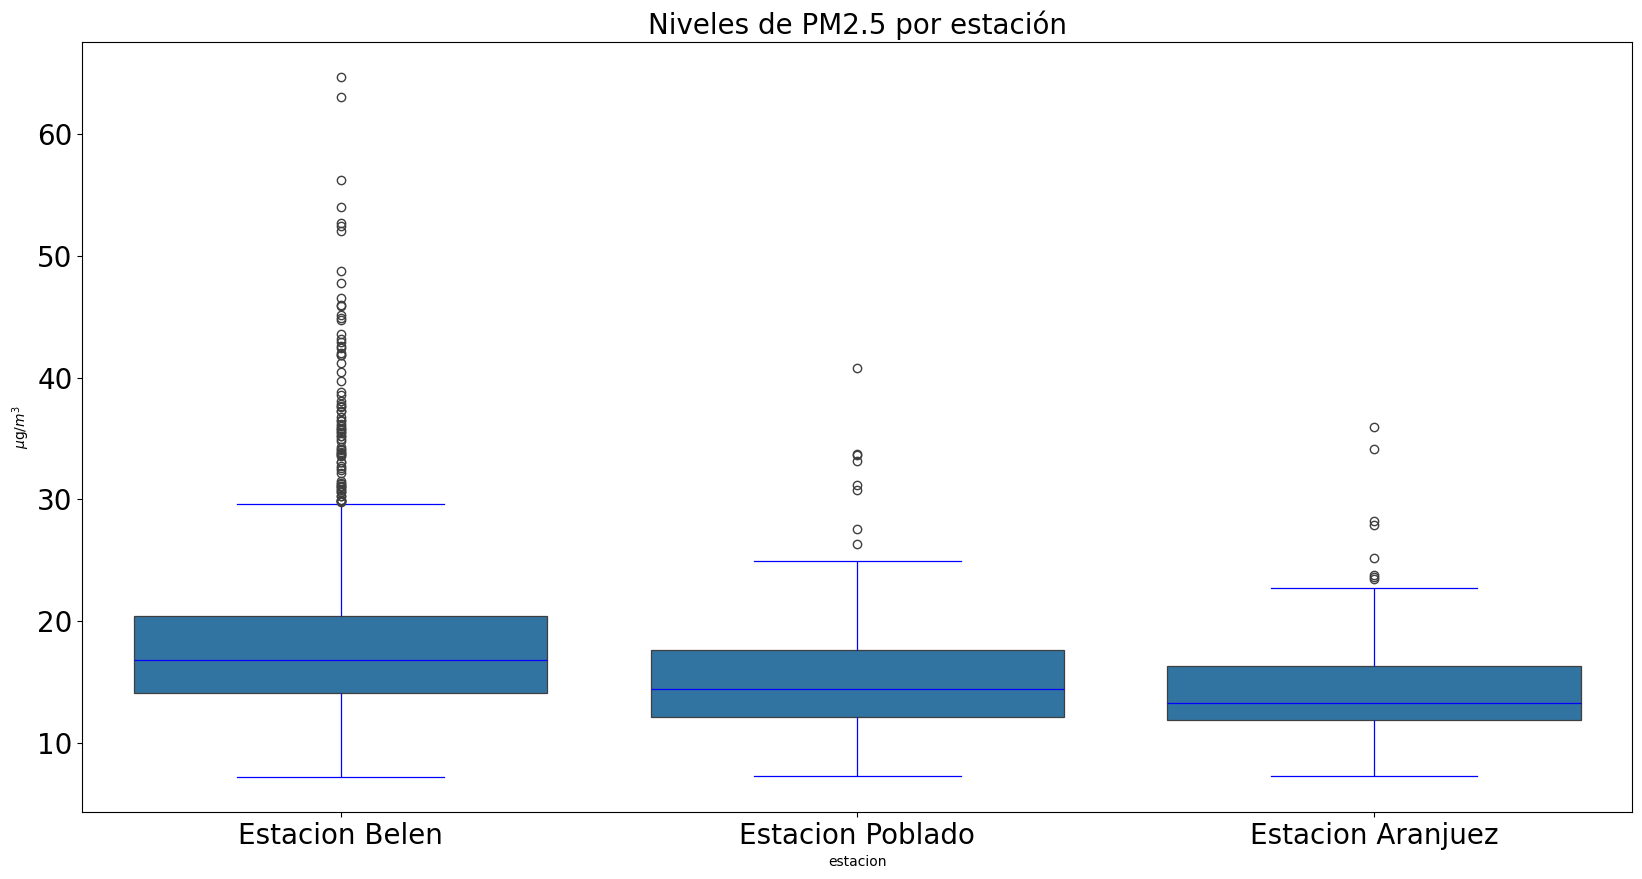

In [50]:
# Box Plot PM2.5 agrupado por estaciones
plt.figure(figsize=(20,10) )
ax = sns.boxplot(x=dataSetcalidad['estacion'], y= dataSetcalidad['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

Guardamos ya el dataSet de calidad Aire

In [51]:
dataSetcalidad.to_csv("data/stage/dataSetCalidadAire.csv", index=False)

## Limpieza datos RIPS 

In [52]:
## Se importa el csv
rips = pd.read_csv("data/raw/datosMedicos/RIPS_J000_J989_2020-2024P.csv")
rips.head()

,Encrypt,FechaConsulta,TipoCupsAtencion,sexo,edad,TipoUsuario,CodigoDiagnosticoPpal,NombreDX,Nombre298,NombreIPS,NombreEAPB,FechaSalidaUrgencias,FechaEgresoHospitalización
0,0x00002DED4396DEB1170CA180E1263A23C16C6DCF60CC...,2023-05-11,AMBULATORIA,F,34,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CIS COMFAMA CALASANZ,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN
1,0x00005427512BFF1AD5E02D07CB2EDAC0383EAFA2AEE2...,2024-05-23,AMBULATORIA,F,15,2,J329,SINUSITIS CRONICA,Sinusitis Crónica,FUNDACIÓN CLÍNICA NOEL,COOSALUD EPS S.A.,NaN,NaN
2,0x0000D652F2A46DC9AB562874465E7D2FF1E08F3843AD...,2020-02-21,AMBULATORIA,M,79,1,J029,FARINGITIS AGUDA,Faringitis Aguda y Amigdalitis Aguda,IPS SURA LOS MOLINOS MEDELLIN,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN
3,0x0000DA30FA3F9BA50AE5E82F085FD77EE5A0B596C235...,2021-09-20,AMBULATORIA,M,2,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CENTRO DE SALUD MORAVIA,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. SAVIA SALUD,NaN,NaN
4,0x0001301D8B5F4EC23FFC2E5C1A129BA54469FC82F056...,2023-03-24,AMBULATORIA,F,87,1,J449,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Bronquitis enfisema y otras Enfermedades Pulm...,VIVA 1A IPS ESTADIO,NUEVA EMPRESA PROMOTORA DE SALUD S.A. SIGLA NU...,NaN,NaN


In [53]:
rips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436530 entries, 0 to 3436529
Data columns (total 13 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Encrypt                     object
 1   FechaConsulta               object
 2   TipoCupsAtencion            object
 3   sexo                        object
 4   edad                        int64 
 5   TipoUsuario                 int64 
 6   CodigoDiagnosticoPpal       object
 7   NombreDX                    object
 8   Nombre298                   object
 9   NombreIPS                   object
 10  NombreEAPB                  object
 11  FechaSalidaUrgencias        object
 12  FechaEgresoHospitalización  object
dtypes: int64(2), object(11)
memory usage: 340.8+ MB


tamaño del archivo

In [54]:
len(rips)

3436530

Revisar la cantidad de IPS de nuestros datos médicos que tengan más de 1020 atenciones

In [55]:
columnaIPS = rips.groupby("NombreIPS").size()
columnaIPS2 =columnaIPS [columnaIPS >1020] 
columnaIPS2
#Guardamos el csv (Esto es solo la primera vez)
#columnaIPS2.to_csv("data/stage/nombresIPS.csv", index=True)

NombreIPS
AMANDA VIOLETA RODRIGUEZ DE PEREZ           3921
ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA     7430
ANDRES FELIPE LONDOÑO BUSTAMANTE            2435
Aida Lida Castro Arias                      7628
Alina Restrepo Velez                        1386
                                           ...  
William Reinel Mejia Salazar                1566
especialistas en casa                      14162
helPharma Almacentro                       13013
jonathan rozenboim matiz                    1515
ÉDISON MORALES CÁRDENAS                     2748
Length: 214, dtype: int64

Se realizó en el archivo nombresIPS.csv agregar la columna comuna para saber la IPS en que comuna realiza el proceso médicos

Eliminar Registros que no cumplan que los centros médicos tengan más de 1020 atenciones por diagnósticos de enfermedades respiratorias

In [56]:
comunaIPS = pd.read_csv("data/raw/datosMedicos/nombresIPS.csv")
comunaIPS.head(8)

,NombreIPS,conteo_ips,comuna_ips
0,AMANDA VIOLETA RODRIGUEZ DE PEREZ,3921,comuna 14
1,ANA MARIA DE LAS MERCEDES MEJIA GAVIRIA,7430,comuna 14
2,ANDRES FELIPE LONDOÑO BUSTAMANTE,2435,comuna 10
3,Aida Lida Castro Arias,7628,comuna 14
4,Alina Restrepo Velez,1386,comuna 14
5,Arenas Ruiz Carolina,2553,comuna 14
6,BEATRIZ CECILIA VILLEGAS ORTEGA,2184,comuna 14
7,BIENESTAR IPS SEDE MEDELLIN,10717,comuna 4


Aplicar al dataset RIPS columna comuna

In [57]:
rips2 = pd.merge(rips, comunaIPS, on='NombreIPS', how='inner')
rips2.head(5)


,Encrypt,FechaConsulta,TipoCupsAtencion,sexo,edad,TipoUsuario,CodigoDiagnosticoPpal,NombreDX,Nombre298,NombreIPS,NombreEAPB,FechaSalidaUrgencias,FechaEgresoHospitalización,conteo_ips,comuna_ips
0,0x00002DED4396DEB1170CA180E1263A23C16C6DCF60CC...,2023-05-11,AMBULATORIA,F,34,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CIS COMFAMA CALASANZ,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN,36229,comuna 12
1,0x00005427512BFF1AD5E02D07CB2EDAC0383EAFA2AEE2...,2024-05-23,AMBULATORIA,F,15,2,J329,SINUSITIS CRONICA,Sinusitis Crónica,FUNDACIÓN CLÍNICA NOEL,COOSALUD EPS S.A.,NaN,NaN,15308,comuna 14
2,0x0000D652F2A46DC9AB562874465E7D2FF1E08F3843AD...,2020-02-21,AMBULATORIA,M,79,1,J029,FARINGITIS AGUDA,Faringitis Aguda y Amigdalitis Aguda,IPS SURA LOS MOLINOS MEDELLIN,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.,NaN,NaN,20673,comuna 16
3,0x0000DA30FA3F9BA50AE5E82F085FD77EE5A0B596C235...,2021-09-20,AMBULATORIA,M,2,1,J00X,RINOFARINGITIS AGUDA [RESFRIADO COMUN],Otras Infecciones Agudas de las Vías Respirato...,CENTRO DE SALUD MORAVIA,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S. SAVIA SALUD,NaN,NaN,2128,comuna 4
4,0x0001301D8B5F4EC23FFC2E5C1A129BA54469FC82F056...,2023-03-24,AMBULATORIA,F,87,1,J449,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Bronquitis enfisema y otras Enfermedades Pulm...,VIVA 1A IPS ESTADIO,NUEVA EMPRESA PROMOTORA DE SALUD S.A. SIGLA NU...,NaN,NaN,21307,comuna 11


### Eliminación de columnas 

Se eliminaron por motivos que detallamos que no son relevantes para el estudio

In [58]:
# Eliminar columna de no interés en el estudio del dataframe.
columnasAEliminar = ['Encrypt','TipoCupsAtencion','sexo','TipoUsuario','CodigoDiagnosticoPpal',
                     'NombreDX','Nombre298','NombreEAPB','FechaSalidaUrgencias','FechaEgresoHospitalización','conteo_ips']

#Eliminar columnas de datos médicos
rips2 = eliminarColumnas(rips2,columnasAEliminar)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11


Revisa el tamaño

In [59]:
len(rips2)

3335545

### Creación columnas de interés

Columnas fechas

In [60]:
def agregarColumnasFechas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['FechaConsulta']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['FechaConsulta']).dt.month
    return dataTemporal

# Agregar columnas de fechas

rips2 = agregarColumnasFechas(rips2)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips,anio,dia,mes
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3


Crear columna Sector

In [61]:
def definirSectorIPS(comuna):
    """
    Función para definir el sector de las IPS
    args:   comuna_ips = comuna donde se encuentra la IPS
    In[0]: comuna
    Out[0]: sector_ips
    """
    if comuna == 'comuna 7' or comuna == 'comuna 6' or comuna == 'comuna 5':
        return 'Noroccidental'
    elif comuna == 'comuna 12' or comuna == 'comuna 11' or comuna == 'comuna 13':
        return 'Centroccidental'
    elif comuna == 'comuna 16' or comuna == 'comuna 15':
        return 'Suroccidental'
    elif comuna == 'comuna 2' or comuna == 'comuna 1' or comuna == 'comuna 3' or comuna == 'comuna 4':
        return 'Nororiental'
    elif comuna == 'comuna 8' or comuna == 'comuna 9' or comuna == 'comuna 10':
        return 'Centroriental'
    elif comuna == 'comuna 14':
        return 'Suroriental'
    else :
        return 'Sin comuna'
    
# # Aplicamos la función crearFranjaHoraria
rips2['sector_ips'] = rips2.apply(lambda row: definirSectorIPS(row['comuna_ips']), axis=1)
rips2.head(5)

,FechaConsulta,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips
0,2023-05-11,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental
1,2024-05-23,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental
2,2020-02-21,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental
3,2021-09-20,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental
4,2023-03-24,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental


In [62]:
rips2.drop('FechaConsulta',axis=1,inplace=True)
rips2.head(5)

,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips
0,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental
1,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental
2,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental
3,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental
4,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental


Creación Columna Atención pacientes por IPS y fecha

In [63]:
# Contamos las filas por cada combinación de 'anio', 'mes' y 'dia' y 'NombreIPS'
rips2['atenciones_por_dia'] = rips2.groupby(['NombreIPS','anio', 'mes', 'dia'])['edad'].transform('count')
rips2.head(5)


,edad,NombreIPS,comuna_ips,anio,dia,mes,sector_ips,atenciones_por_dia
0,34,CIS COMFAMA CALASANZ,comuna 12,2023,11,5,Centroccidental,58
1,15,FUNDACIÓN CLÍNICA NOEL,comuna 14,2024,23,5,Suroriental,15
2,79,IPS SURA LOS MOLINOS MEDELLIN,comuna 16,2020,21,2,Suroccidental,97
3,2,CENTRO DE SALUD MORAVIA,comuna 4,2021,20,9,Nororiental,2
4,87,VIVA 1A IPS ESTADIO,comuna 11,2023,24,3,Centroccidental,39


Se guarda el archivo 

In [64]:
rips2.to_csv("data/stage/dataSetRIPS.csv",index=False)

### Concatenación de nuestro dos dataframes Limpios
ADEMÁS SE DEBE CONCATENAR POR LA COMUNA o el sector ES DECIR EN LOS DATOS METEREOLOGICOS TENEMOS QUE SABER O CREAR UNA COLUMNA DE ACUERDO A LA ESTACION PARA ESTA FORMA NO SE GENEREN REGISTROS SIN VALOR 

In [65]:
dataSetCompleto = rips2.merge(dataSetcalidad, right_on=['anio', 'mes', 'dia', 'comuna'], 
                         left_on=['anio', 'mes', 'dia', 'comuna_ips'], how='inner')

# Eliminar la columna 'comuna_ips' si ya no es necesaria
dataSetCompleto = dataSetCompleto.drop(columns=['comuna_ips'])
dataSetCompleto.head(5)

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,79,IPS SURA LOS MOLINOS MEDELLIN,2020,21,2,Suroccidental,97,34.2562,1,Media semana,...,1,1.0,1,1.0,1.0,1.12,1.6,257.0,261.0,comuna 16
1,88,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2023,6,9,Suroriental,129,14.9075,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.80,1.7,145.0,183.0,comuna 14
2,89,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2024,5,7,Suroriental,142,15.2972,1,Media semana,...,1,1.0,1,1.0,1.0,0.38,0.7,187.0,204.0,comuna 14
3,64,NEUMOMED S.A.S.,2021,11,5,Suroriental,46,9.7798,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.88,1.8,96.5,116.5,comuna 14
4,87,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2023,22,4,Suroriental,144,12.2535,1,Fin de Semana,...,1,1.0,1,1.0,1.0,0.70,1.4,176.0,203.0,comuna 14


### Limpieza de los datos 

- Se va a revisar que no se tengan datos limpios

In [66]:
#Revisar nulos

dataSetCompleto.isnull().sum()

edad                     0
NombreIPS                0
anio                     0
dia                      0
mes                      0
sector_ips               0
atenciones_por_dia       0
pm25                     0
calidad_pm25             0
dia_semana               0
estacion                 0
festivo                  0
temperatura              0
humedad                  0
presion                  0
p1                       0
calidad_humedad          0
calidad_temperatura      0
calidad_presion          0
calidad_precipitacion    0
calidad_vientos          0
velocidad_prom           0
velocidad_max            0
direccion_prom           0
direccion_max            0
comuna                   0
dtype: int64

In [67]:
len(dataSetCompleto)

155518

Guardamos datset

In [68]:
dataSetCompleto.to_csv("data/datasetCompleto.csv", index=False)

In [69]:
dataSetCompleto.columns

Index(['edad', 'NombreIPS', 'anio', 'dia', 'mes', 'sector_ips',
       'atenciones_por_dia', 'pm25', 'calidad_pm25', 'dia_semana', 'estacion',
       'festivo', 'temperatura', 'humedad', 'presion', 'p1', 'calidad_humedad',
       'calidad_temperatura', 'calidad_presion', 'calidad_precipitacion',
       'calidad_vientos', 'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'comuna'],
      dtype='object')

In [70]:
# Agrupar por todas las columnas para identificar duplicados
grupos = dataSetCompleto.groupby(dataSetCompleto.columns.tolist()).groups

# Filtrar grupos con registros duplicados (más de un índice)
duplicados = [indices.tolist() for indices in grupos.values() if len(indices) > 1]

# Mostrar los resultados
if len(duplicados) == 0:
    print("No hay registros duplicados.")
else:
    print("Registros duplicados (índices agrupados):")
    for grupo in duplicados:
        print(f"Índices: {grupo}")

Registros duplicados (índices agrupados):
Índices: [13243, 56793]
Índices: [24023, 28633]
Índices: [94835, 109320]
Índices: [68694, 83398, 90118]
Índices: [135150, 141426]
Índices: [8654, 102283]
Índices: [20724, 44648, 113886]
Índices: [2403, 48146]
Índices: [25485, 130434, 133402]
Índices: [65493, 71265]
Índices: [47179, 112724, 128670]
Índices: [1811, 73343, 88929]
Índices: [25634, 87310]
Índices: [12689, 34096, 64825, 92284, 100235, 111041, 111209, 131035]
Índices: [89896, 92380]
Índices: [12522, 57607, 92809, 119835, 155202]
Índices: [61934, 128622]
Índices: [3969, 69094, 117783, 126884]
Índices: [49602, 104164]
Índices: [18500, 23461]
Índices: [21920, 54506, 62750, 74646]
Índices: [97186, 144322]
Índices: [12641, 127857]
Índices: [1760, 7724, 40389, 60720, 81068, 85768, 115265, 128488, 134262]
Índices: [11420, 97817]
Índices: [48416, 122361]
Índices: [30202, 38019, 54075, 122504, 130870]
Índices: [11138, 30209, 39787, 42144, 85375, 87227, 119360, 135955]
Índices: [13418, 39128, 1

In [71]:
dataSetCompleto.loc[[68694,83398,90118]]

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
68694,0,BIENESTAR IPS SEDE MEDELLIN,2023,23,5,Nororiental,21,15.7817,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.9,1.6,198.0,184.0,comuna 4
83398,0,BIENESTAR IPS SEDE MEDELLIN,2023,23,5,Nororiental,21,15.7817,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.9,1.6,198.0,184.0,comuna 4
90118,0,BIENESTAR IPS SEDE MEDELLIN,2023,23,5,Nororiental,21,15.7817,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.9,1.6,198.0,184.0,comuna 4


In [72]:
datosDuplicados = dataSetCompleto[dataSetCompleto.duplicated()]
datosDuplicados.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
149,100,CLINICA MEDELLIN OCCIDENTE,2020,30,1,Suroccidental,28,26.3998,1,Media semana,...,1,1.0,1,1.0,1.0,1.26,1.8,255.0,258.0,comuna 16
211,79,UNIDAD HOSPITALARIA DE BELEN HECTOR ABAD GOMEZ,2021,5,10,Suroccidental,19,14.1043,1,Inicio Semana,...,1,1.0,1,1.0,1.0,0.92,1.4,188.0,212.0,comuna 16
280,0,Corporación Hospital Infantil Concejo de Medellín,2024,31,7,Nororiental,90,14.4352,1,Inicio Semana,...,1,1.0,1,1.0,1.0,1.70,3.2,73.0,75.0,comuna 4
655,1,Corporación Hospital Infantil Concejo de Medellín,2023,11,8,Nororiental,85,12.1257,1,Media semana,...,1,1.0,1,1.0,1.0,1.60,2.9,126.0,99.0,comuna 4
668,6,IPS SURA VIRTUAL,2024,20,6,Suroriental,51,14.3432,1,Media semana,...,1,1.0,1,1.0,1.0,0.79,1.6,82.0,116.5,comuna 14


In [73]:
len(datosDuplicados) 

54782

- Eliminar duplicados


In [74]:

dataSetCompleto = dataSetCompleto.drop_duplicates()
len(dataSetCompleto)

100736

#### Revisar outliers con isolation forest

Variables categoricas


In [75]:
columnasCategoricas = dataSetCompleto.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas

['NombreIPS', 'sector_ips', 'dia_semana', 'estacion', 'comuna']

Variables númericas

In [76]:
columnasNumericas=dataSetCompleto.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
columnasNumericas

['edad',
 'anio',
 'dia',
 'mes',
 'atenciones_por_dia',
 'pm25',
 'calidad_pm25',
 'festivo',
 'temperatura',
 'humedad',
 'presion',
 'p1',
 'calidad_humedad',
 'calidad_temperatura',
 'calidad_presion',
 'calidad_precipitacion',
 'calidad_vientos',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max']

In [77]:
# Seleccionar solo las columnas numéricas
cols_numericas = columnasNumericas
df_numerico = dataSetCompleto[cols_numericas]

df_numerico

# Escalar los datos para mejorar la detección
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df_numerico)

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
dataSetCompleto["outlier"] = iso_forest.fit_predict(X_scaled)  # -1 es outlier, 1 es normal

# Contar outliers detectados
num_outliers = (dataSetCompleto["outlier"] == -1).sum()
print(f"Se detectaron {num_outliers} outliers")

# Mostrar los outliers

outliers = dataSetCompleto[dataSetCompleto["outlier"] == -1]
outliers

Se detectaron 5037 outliers


,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna,outlier
13,1,Corporación Hospital Infantil Concejo de Medellín,2024,11,2,Nororiental,85,13.2122,1,Fin de Semana,...,1.0,1,1.0,1.0,1.900,3.5,40.0,50.0,comuna 4,-1
18,0,Corporación Hospital Infantil Concejo de Medellín,2024,31,7,Nororiental,90,14.4352,1,Inicio Semana,...,1.0,1,1.0,1.0,1.700,3.2,73.0,75.0,comuna 4,-1
21,81,Coomeva Emergencia Medica Servicio De Ambulanc...,2023,16,10,Suroriental,9,13.0318,1,Inicio Semana,...,1.0,1,1.0,1.0,0.870,1.6,56.0,63.0,comuna 14,-1
27,8,FUNDACIÓN CLÍNICA NOEL,2024,5,3,Suroriental,23,40.8211,1,Inicio Semana,...,1.0,1,1.0,1.0,1.165,2.1,46.0,52.5,comuna 14,-1
52,4,EMPRESA DE MEDICINA INTEGRAL EMI S.A.S. SERVIC...,2024,28,3,Suroriental,97,30.7728,1,Media semana,...,1.0,1,1.0,1.0,0.930,1.9,137.0,187.0,comuna 14,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155248,54,IPS SURA LOS MOLINOS MEDELLIN,2020,2,3,Suroccidental,152,33.7436,1,Inicio Semana,...,1.0,1,1.0,1.0,1.390,2.8,77.0,75.5,comuna 16,-1
155279,53,IPS SURA LOS MOLINOS MEDELLIN,2021,18,5,Suroccidental,5,15.3337,1,Inicio Semana,...,2.0,2,2.0,2.0,0.870,1.1,222.0,241.0,comuna 16,-1
155309,69,CENTRO DE SALUD ARANJUEZ,2024,19,7,Nororiental,1,12.8734,1,Media semana,...,1.0,1,1.0,1.0,1.800,3.5,44.5,56.0,comuna 4,-1
155400,26,CENTRO INTEGRAL DE SALUD ARANJUEZ,2021,8,5,Nororiental,11,9.5158,1,Fin de Semana,...,2.0,2,2.0,2.0,1.000,1.8,282.0,261.0,comuna 4,-1


C:\Users\USER\AppData\Local\Temp\ipykernel_21276\1475576559.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


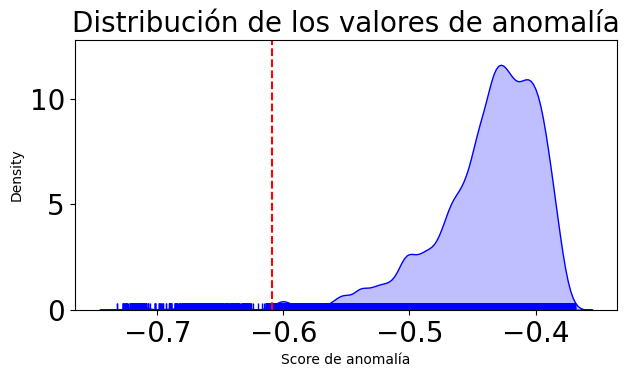

In [78]:
score_anomalia = iso_forest.score_samples(X=X_scaled)
score_anomalia
cuantil_01 = np.quantile(score_anomalia, q=0.01)
cuantil_01

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalía');

In [79]:
#Saber de la cantidad
len(dataSetCompleto)

100736

In [80]:
#Eliminar los outliers
dataSetCompletoSinAnomalias = dataSetCompleto[dataSetCompleto["outlier"]!= -1]
dataSetCompletoConAnomalias = dataSetCompleto[dataSetCompleto["outlier"]== -1]
len(dataSetCompletoSinAnomalias)



95699

### Seleccionar columnas 

In [81]:
dataSetCompletoSinAnomalias.columns

Index(['edad', 'NombreIPS', 'anio', 'dia', 'mes', 'sector_ips',
       'atenciones_por_dia', 'pm25', 'calidad_pm25', 'dia_semana', 'estacion',
       'festivo', 'temperatura', 'humedad', 'presion', 'p1', 'calidad_humedad',
       'calidad_temperatura', 'calidad_presion', 'calidad_precipitacion',
       'calidad_vientos', 'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'comuna', 'outlier'],
      dtype='object')

Para el estudio no es de gran relevancia el NombreIPS, ya que queremos pronosticar la cantidad de pacientes de acuerdo a la calidad del aire en los sectores 

In [82]:

# Se seleccionan las columnas relevantes para el estudio
datosEstudio = dataSetCompletoSinAnomalias[['edad', 'anio', 'dia', 'mes', 'sector_ips',
       'atenciones_por_dia', 'pm25', 'dia_semana',
       'festivo', 'temperatura', 'humedad', 'presion', 'p1',
        'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'comuna']].copy()

datosEstudio.head()

,edad,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,79,2020,21,2,Suroccidental,97,34.2562,Media semana,0,18.58,89.030,843.13,0.44,1.12,1.6,257.0,261.0,comuna 16
1,88,2023,6,9,Suroriental,129,14.9075,Inicio Semana,0,25.60,52.230,850.20,0.00,0.80,1.7,145.0,183.0,comuna 14
2,89,2024,5,7,Suroriental,142,15.2972,Media semana,0,21.40,77.175,851.78,0.03,0.38,0.7,187.0,204.0,comuna 14
3,64,2021,11,5,Suroriental,46,9.7798,Inicio Semana,0,23.30,67.000,849.20,0.00,0.88,1.8,96.5,116.5,comuna 14
4,87,2023,22,4,Suroriental,144,12.2535,Fin de Semana,0,21.20,79.260,849.70,0.02,0.70,1.4,176.0,203.0,comuna 14


Pasar las variables categoricas a númericas

In [83]:
# Seleccionar las columnas categóricas automáticamente
cols_categoricas = datosEstudio.select_dtypes(include=['object', 'category']).columns

# Crear instancia de OrdinalEncoder sin definir orden (usa orden alfabético)
encoder = OrdinalEncoder()

# Aplicar la transformación directamente a las columnas categóricas
datosEstudio[cols_categoricas] = encoder.fit_transform(datosEstudio[cols_categoricas])
datosEstudio.head()

,edad,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,79,2020,21,2,1.0,97,34.2562,2.0,0,18.58,89.030,843.13,0.44,1.12,1.6,257.0,261.0,1.0
1,88,2023,6,9,2.0,129,14.9075,1.0,0,25.60,52.230,850.20,0.00,0.80,1.7,145.0,183.0,0.0
2,89,2024,5,7,2.0,142,15.2972,2.0,0,21.40,77.175,851.78,0.03,0.38,0.7,187.0,204.0,0.0
3,64,2021,11,5,2.0,46,9.7798,1.0,0,23.30,67.000,849.20,0.00,0.88,1.8,96.5,116.5,0.0
4,87,2023,22,4,2.0,144,12.2535,0.0,0,21.20,79.260,849.70,0.02,0.70,1.4,176.0,203.0,0.0


In [84]:
datosEstudio.describe()

,edad,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
count,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000,95699.0000
mean,44.3380,2022.5011,15.8866,6.2304,1.3121,42.8934,17.5138,1.1511,0.0233,21.8814,76.0897,846.8541,0.0884,0.9657,1.6368,189.1010,205.6493,0.6879
std,29.0073,1.2668,8.4866,3.2004,0.6003,57.5129,6.7908,0.6751,0.1510,2.0628,9.8212,3.5619,0.1858,0.2421,0.4199,58.9404,54.1396,0.6003
min,0.0000,2020.0000,1.0000,1.0000,0.0000,1.0000,7.2032,0.0000,0.0000,16.7600,46.8000,839.8000,0.0000,0.3800,0.7000,48.0000,61.0000,0.0000
25%,19.0000,2021.0000,9.0000,4.0000,1.0000,10.0000,13.1648,1.0000,0.0000,20.4000,69.1100,843.7000,0.0100,0.8200,1.3000,155.0000,193.0000,0.0000
50%,44.0000,2023.0000,15.0000,6.0000,1.0000,20.0000,15.8047,1.0000,0.0000,21.9000,76.4500,845.7000,0.0300,0.9500,1.6000,202.0000,223.0000,1.0000
75%,69.0000,2023.0000,23.0000,9.0000,2.0000,41.0000,19.7125,2.0000,0.0000,23.3600,82.6000,850.3500,0.0800,1.1000,1.9000,235.5000,244.0000,1.0000
max,120.0000,2024.0000,31.0000,12.0000,2.0000,429.0000,64.7204,2.0000,1.0000,26.3900,98.0000,854.6000,1.9000,2.0000,3.6000,332.0000,309.0000,2.0000


In [85]:
datosEstudio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95699 entries, 0 to 155515
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                95699 non-null  int64  
 1   anio                95699 non-null  int32  
 2   dia                 95699 non-null  int32  
 3   mes                 95699 non-null  int32  
 4   sector_ips          95699 non-null  float64
 5   atenciones_por_dia  95699 non-null  int64  
 6   pm25                95699 non-null  float64
 7   dia_semana          95699 non-null  float64
 8   festivo             95699 non-null  int64  
 9   temperatura         95699 non-null  float64
 10  humedad             95699 non-null  float64
 11  presion             95699 non-null  float64
 12  p1                  95699 non-null  float64
 13  velocidad_prom      95699 non-null  float64
 14  velocidad_max       95699 non-null  float64
 15  direccion_prom      95699 non-null  float64
 16  direccio

Escalamos los datos

In [86]:
#Escalar los datos
scaler = MinMaxScaler()
datosEstudio[datosEstudio.columns] = scaler.fit_transform(datosEstudio[datosEstudio.columns])
datosEstudio.head()


,edad,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.6583,0.00,0.6667,0.0909,0.5,0.2243,0.4703,1.0,0.0,0.1890,0.8248,0.2250,0.2316,0.4568,0.3103,0.7359,0.8065,0.5
1,0.7333,0.75,0.1667,0.7273,1.0,0.2991,0.1339,0.5,0.0,0.9180,0.1061,0.7027,0.0000,0.2593,0.3448,0.3415,0.4919,0.0
2,0.7417,1.00,0.1333,0.5455,1.0,0.3294,0.1407,1.0,0.0,0.4818,0.5933,0.8095,0.0158,0.0000,0.0000,0.4894,0.5766,0.0
3,0.5333,0.25,0.3333,0.3636,1.0,0.1051,0.0448,0.5,0.0,0.6791,0.3945,0.6351,0.0000,0.3086,0.3793,0.1708,0.2238,0.0
4,0.7250,0.75,0.7000,0.2727,1.0,0.3341,0.0878,0.0,0.0,0.4611,0.6340,0.6689,0.0105,0.1975,0.2414,0.4507,0.5726,0.0


### Revisar Correlación de los datos

<Axes: >

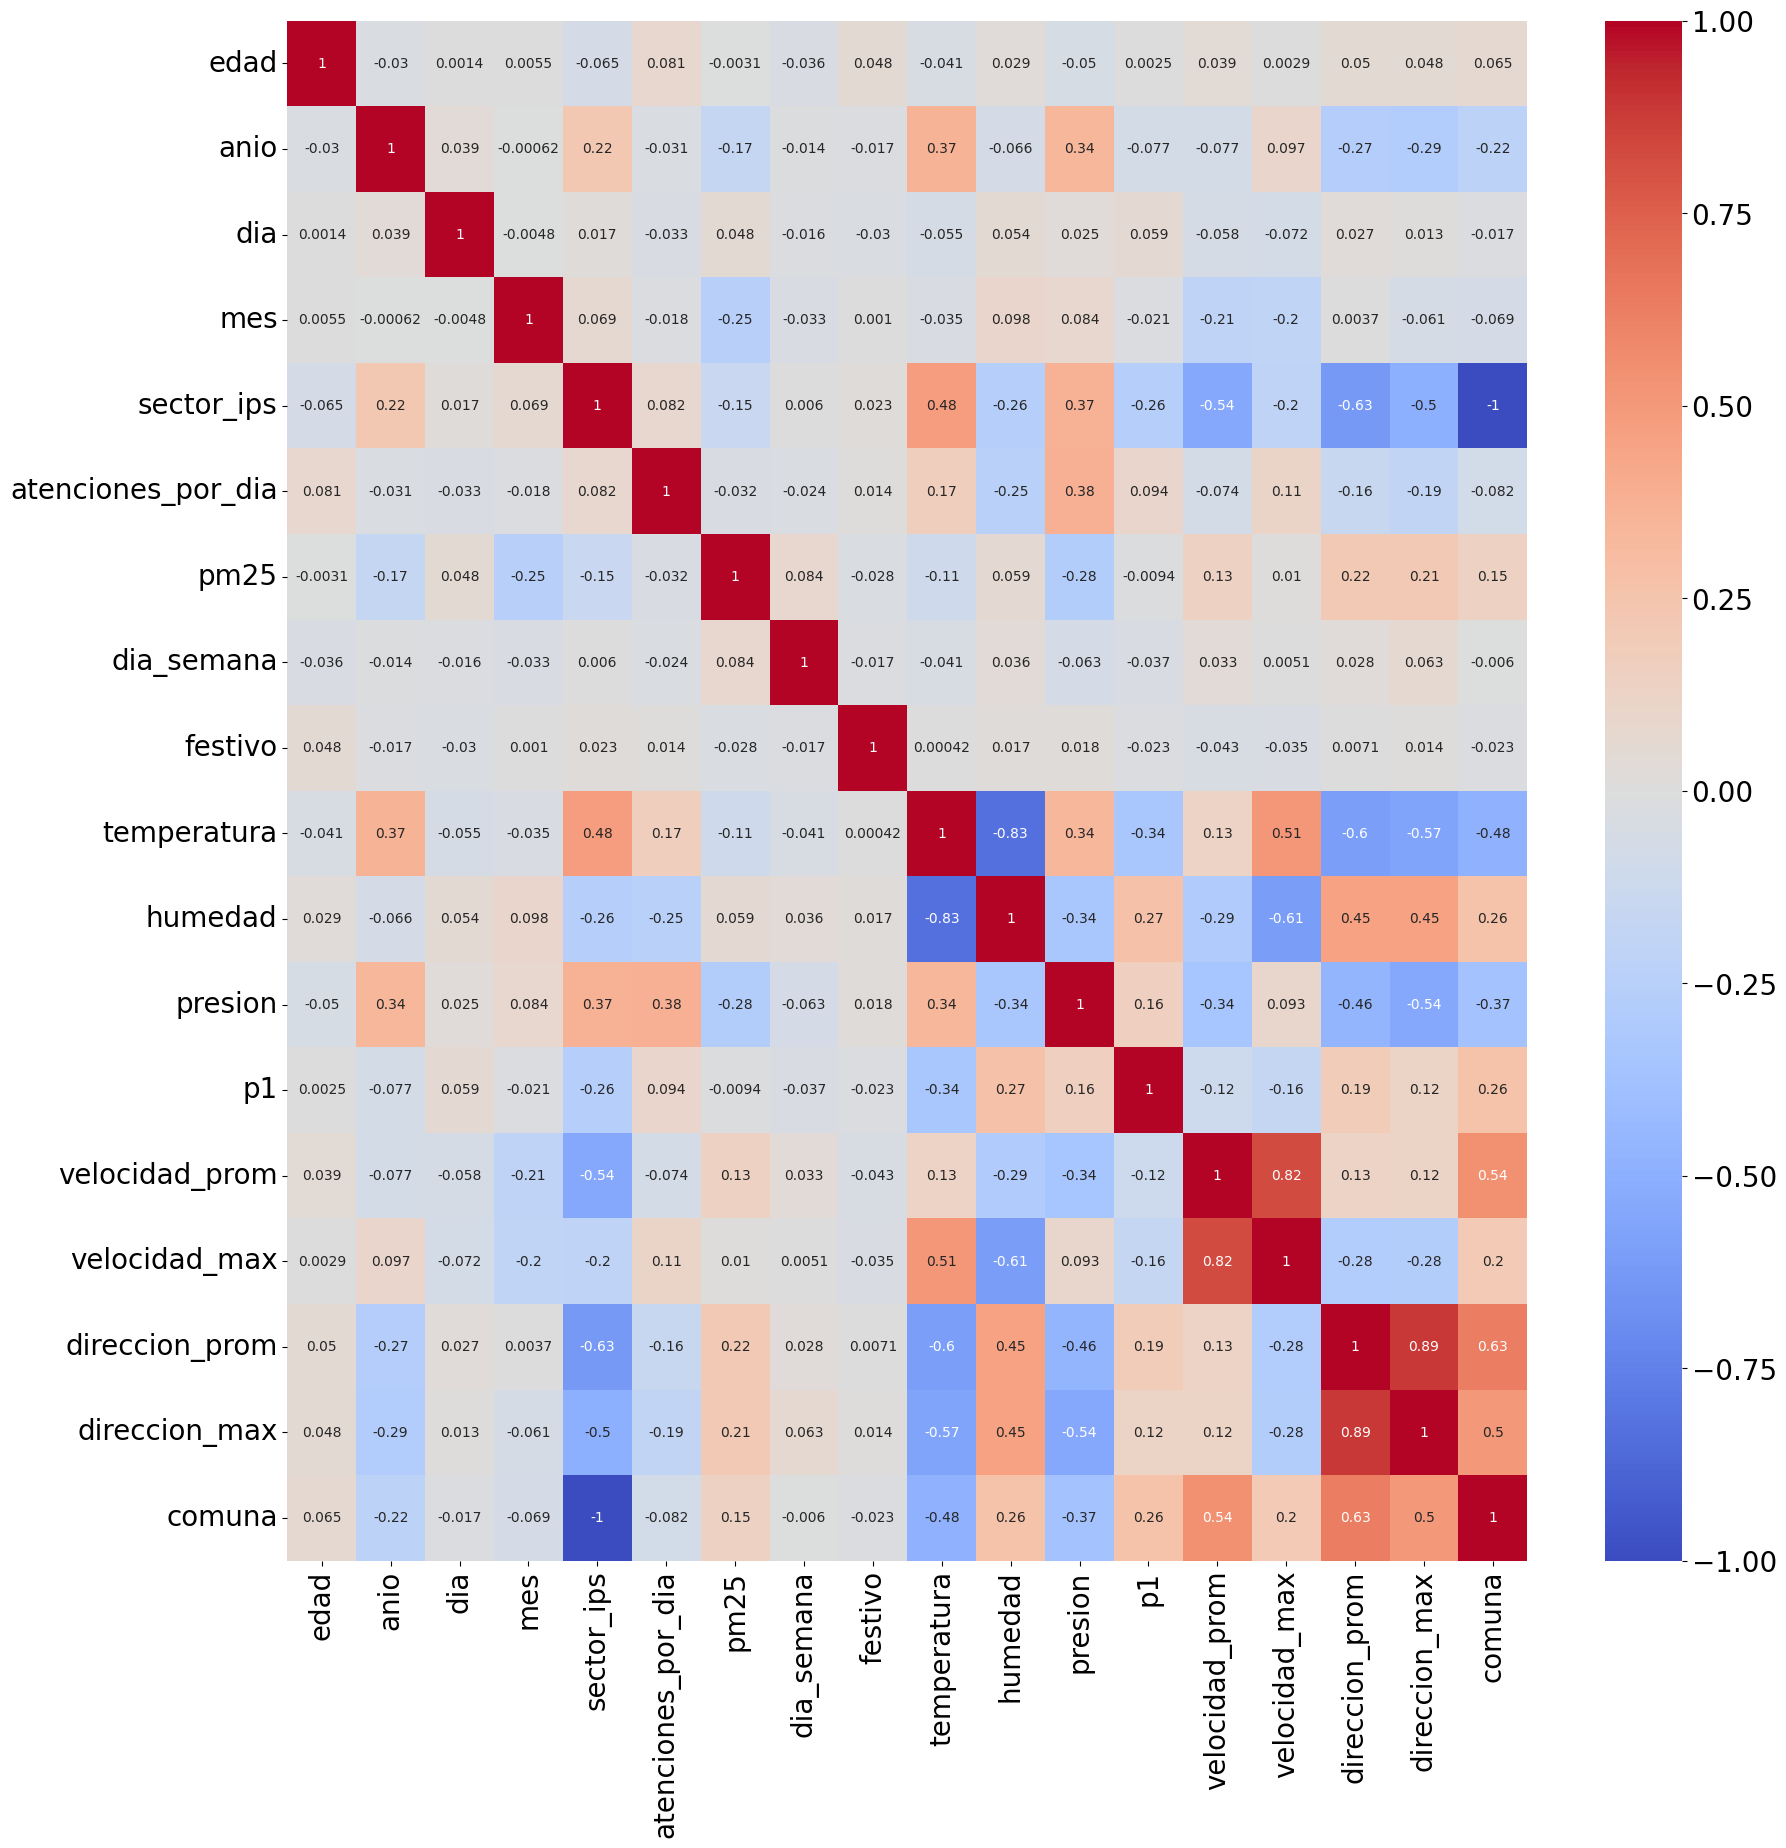

In [87]:
#Se mira la correlación de los datos

corr_matrix = datosEstudio.corr()
corr_matrix


# Visualizar la matriz de correlación

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Hacer modelo inicial con SVM y Regresión Bayesiana para explorar 

In [88]:
#Division dataset
#variable objetivo 
X = datosEstudio.drop('atenciones_por_dia', axis=1)
y = datosEstudio['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

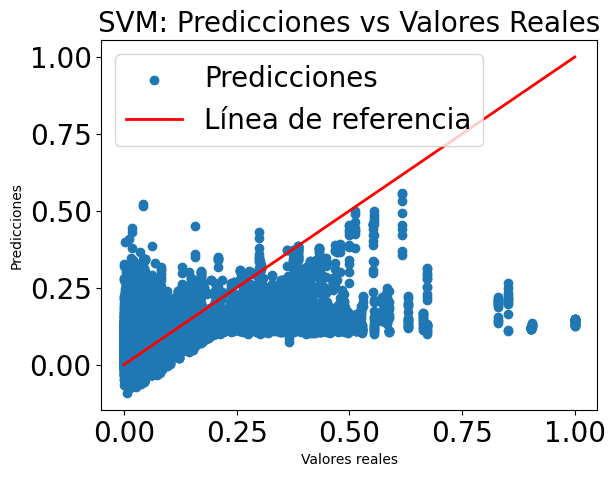

In [89]:
#Modelo SVM 
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Definir el rango de parámetros a explorar
# svm_model = svm.SVR()
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# # Búsqueda en grid (cross-validation) para encontrar los mejores parámetros
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Imprimir los mejores parámetros encontrados
# print(f"Mejores parámetros: {grid_search.best_params_}")

# # Usar el mejor modelo encontrado para hacer predicciones
# best_model = grid_search.best_estimator_
# svm_predictions = best_model.predict(X_test)


# Graficar resultados
plt.scatter(y_test, svm_predictions, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea de referencia')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('SVM: Predicciones vs Valores Reales')
plt.legend()
plt.show()



In [90]:
# #Guardar el modelo en la carpeta data/analytics

# with open('data/analytics/svm_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)


In [91]:
# # Abrir el archivo en modo lectura binaria
# with open('data/analytics/svm_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

In [92]:
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, svm_predictions)
rmse = np.sqrt(mse)
#Metricas mae

mae = mean_absolute_error(y_test, svm_predictions)
r2 = r2_score(y_test, svm_predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.012977548008132245
Root Mean Squared Error (RMSE): 0.11391904146424445
R-squared (R2): 0.27599496459416994


Número de clases: 6


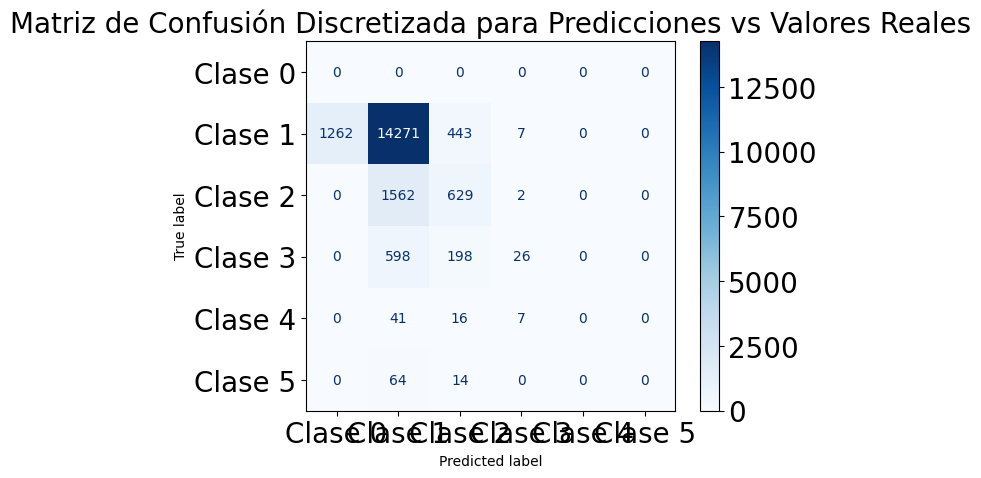

In [93]:
# Definir los intervalos
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0"]

# Discretizar las etiquetas reales (si es necesario)
y_test_discretized = np.digitize(y_test, bins) - 1  # Convertir en categorías

# Discretizar las predicciones del modelo
svm_predictions_discretized = np.digitize(svm_predictions, bins) - 1

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_discretized, svm_predictions_discretized)

# Ver el número de clases que la matriz de confusión contiene
print(f"Número de clases: {conf_matrix.shape[0]}")

# Ajustar las etiquetas si el número de clases es diferente de 5
num_classes = conf_matrix.shape[0]
if num_classes != len(labels):
    # Si el número de clases no coincide, actualizar las etiquetas
    labels = [f"Clase {i}" for i in range(num_classes)]

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Discretizada para Predicciones vs Valores Reales')
plt.show()

pairplot De nuestra variable objetivo que es atenciones_por_dia

<Figure size 1500x1500 with 0 Axes>

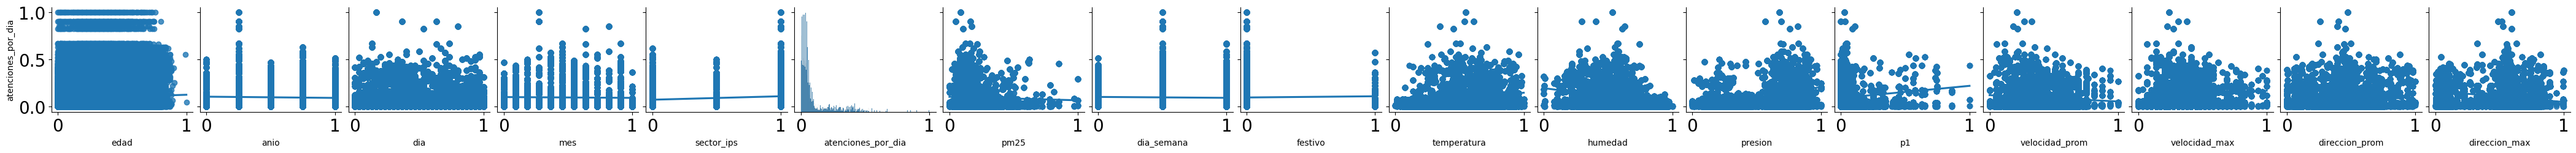

In [95]:
#Gráficar la variable atenciones_por_dia
plt.figure(figsize=(15,15))
sns.pairplot(datosEstudio, y_vars='atenciones_por_dia', x_vars=datosEstudio.columns[:-1], kind='reg')

Revision de los datos ya que nos dio un modelo con un R2 muy bajo se hicieron pruebas y lo mejor eran los datos del 2021 al 2024

Guardar datos escalados

In [97]:
datosEstudio.to_csv("data/stage/datasetCompeltoEscalados.csv", index=False, sep = ',')


DATASET COMPLETO SIN ESCALAR

In [105]:
dataSetCompletoSinEscalar = pd.read_csv("data/datasetCompleto.csv")

In [107]:
dataSetCompletoSinEscalar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155518 entries, 0 to 155517
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   edad                   155518 non-null  int64  
 1   NombreIPS              155518 non-null  object 
 2   anio                   155518 non-null  int64  
 3   dia                    155518 non-null  int64  
 4   mes                    155518 non-null  int64  
 5   sector_ips             155518 non-null  object 
 6   atenciones_por_dia     155518 non-null  int64  
 7   pm25                   155518 non-null  float64
 8   calidad_pm25           155518 non-null  int64  
 9   dia_semana             155518 non-null  object 
 10  estacion               155518 non-null  object 
 11  festivo                155518 non-null  int64  
 12  temperatura            155518 non-null  float64
 13  humedad                155518 non-null  float64
 14  presion                155518 non-nu

In [126]:
datosEstudio2024=dataSetCompletoSinEscalar[(dataSetCompletoSinEscalar['anio'] == 2023) | (dataSetCompletoSinEscalar['anio'] == 2024) | (dataSetCompletoSinEscalar['anio'] == 2022) | (dataSetCompletoSinEscalar['anio'] == 2021) ]  
datosEstudio2024['anio'].unique()

#Guardamos los datos sin escalar

datosEstudio2024.to_csv("data/analytics/datasetEstudio-2021-2024.csv", index=False, sep = ',')



In [121]:
# Seleccionar las columnas categóricas automáticamente
cols_categoricas = datosEstudio2024.select_dtypes(include=['object', 'category']).columns

# Crear instancia de OrdinalEncoder sin definir orden (usa orden alfabético)
encoder = OrdinalEncoder()

# Aplicar la transformación directamente a las columnas categóricas
datosEstudio2024[cols_categoricas] = encoder.fit_transform(datosEstudio2024[cols_categoricas])

scaler = MinMaxScaler()
datosEstudio2024[datosEstudio2024.columns] = scaler.fit_transform(datosEstudio2024[datosEstudio2024.columns])

X = datosEstudio2024.drop('atenciones_por_dia', axis=1)
y = datosEstudio2024['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = svm.SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, svm_predictions)
rmse = np.sqrt(mse)
#Metricas mae

mae = mean_absolute_error(y_test, svm_predictions)
r2 = r2_score(y_test, svm_predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

C:\Users\USER\AppData\Local\Temp\ipykernel_21276\1002382546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosEstudio2024[cols_categoricas] = encoder.fit_transform(datosEstudio2024[cols_categoricas])
C:\Users\USER\AppData\Local\Temp\ipykernel_21276\1002382546.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosEstudio2024[datosEstudio2024.columns] = scaler.fit_transform(datosEstudio2024[datosEstudio2024.columns])


Mean Squared Error (MSE): 0.013041248503618373
Root Mean Squared Error (RMSE): 0.11419828590490477
R-squared (R2): 0.6281476531294198


Guardar modelo svm_model


In [122]:
#Guardar el modelo en la carpeta data/analytics

with open('data/analytics/svm_modelo2021-2024.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [123]:
datosEstudio2024.head()

,edad,NombreIPS,anio,dia,mes,sector_ips,atenciones_por_dia,pm25,calidad_pm25,dia_semana,...,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
1,0.7333,0.3974,0.6667,0.1667,0.7273,1.0,0.2991,0.2051,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.2079,0.2632,0.3733,0.5009,0.0
2,0.7417,0.3974,1.0000,0.1333,0.5455,1.0,0.3294,0.2155,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5133,0.5755,0.0
3,0.5333,0.7564,0.0000,0.3333,0.3636,1.0,0.1051,0.0686,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.2475,0.2895,0.2117,0.2647,0.0
4,0.7250,0.3974,0.6667,0.7000,0.2727,1.0,0.3341,0.1345,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1584,0.1842,0.4767,0.5719,0.0
5,0.0000,0.3590,1.0000,0.5667,0.6364,0.0,0.0467,0.1634,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5545,0.5789,0.1100,0.0853,1.0


In [124]:
datosEstudio2024.to_csv('data/analytics/datasetEstudio-2021-2024Escalados.csv', index=False, sep = ',')